In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai as fai
import fastai.vision as fv
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import os
import numpy as np
from pathlib import Path
import random
import gc

In [3]:
path = Path('../Project1/flowers')

In [4]:
transforms = fv.get_transforms(flip_vert=True, max_rotate=360, 
                               max_zoom=1.25, max_lighting=0.3)

In [5]:
data = (fv.ImageDataBunch
       .from_folder(path, ds_tfms=transforms, size=224, bs=32)
       .normalize(fv.imagenet_stats))

In [6]:
#data.show_batch(rows=3, figsize=(7,7))

In [7]:
class Net(nn.Module):
    def __init__(self, num_classes=102):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.adaptivePool = fai.layers.AdaptiveConcatPool2d()
        self.fc1 = nn.Linear(128, 32)
        self.fc2 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.adaptivePool(out)
        out = out.reshape(out.size(0), -1)
        self.out = out
        out = self.fc1(out)
        out = self.fc2(out)
        return out
model = Net()

In [8]:
print(model)


Net(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(

In [9]:
learn = fai.basic_train.Learner(data, model, wd=0.1, metrics=
                        [fai.metrics.accuracy, fai.metrics.error_rate])

In [10]:
#learn = fv.create_cnn(data, fv.models.resnet18, metrics=
#                        [fai.metrics.accuracy, fai.metrics.error_rate], wd=0.1)

In [11]:
#learn.save("model1")

In [12]:
learn.summary()

'======================================================================\nLayer (type)         Output Shape         Param #    Trainable \n======================================================================\nConv2d               [32, 32, 224, 224]   2432       True      \n______________________________________________________________________\nBatchNorm2d          [32, 32, 224, 224]   64         True      \n______________________________________________________________________\nReLU                 [32, 32, 224, 224]   0          False     \n______________________________________________________________________\nMaxPool2d            [32, 32, 112, 112]   0          False     \n______________________________________________________________________\nConv2d               [32, 16, 112, 112]   12816      True      \n______________________________________________________________________\nBatchNorm2d          [32, 16, 112, 112]   32         True      \n________________________________________

In [13]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,error_rate


RuntimeError: CUDA out of memory. Tried to allocate 196.00 MiB (GPU 0; 1.96 GiB total capacity; 1.29 GiB already allocated; 183.69 MiB free; 8.00 MiB cached)

In [ ]:
learn.lr_find(); learn.recorder.plot()

In [13]:
learn.fit_one_cycle(4, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate
1,1.811293,1.728338,0.525692,0.474308
2,1.805861,1.619241,0.553360,0.446640
3,1.714957,1.517392,0.573123,0.426877
4,1.648177,1.493706,0.583004,0.416996


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


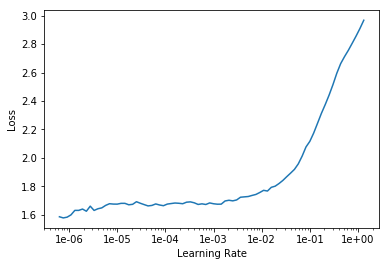

In [14]:
learn.lr_find(); learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate
1,1.623193,1.580024,0.569170,0.430830
2,1.675221,1.525322,0.567194,0.432806
3,1.561602,1.433232,0.600791,0.399209
4,1.505021,1.364679,0.630435,0.369565


In [20]:
learn.lr_find(); learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 196.00 MiB (GPU 0; 1.96 GiB total capacity; 1.31 GiB already allocated; 125.69 MiB free; 45.74 MiB cached)

In [ ]:
learn.fit_one_cycle(4, max_lr=1e-3)

In [ ]:
#learn.fit_one_cycle(16, max_lr=1e-3)